<a href="https://colab.research.google.com/github/bermudezfc/CCDATSCL_EXERCISES_COM221/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [13]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [14]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [16]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [17]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [18]:
# put your answer here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [19]:
# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (49068, 10)

Column names:
['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']

First few rows:


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [20]:
# Check date information
print("Date column data type:", df['Date'].dtype)
print("\nDate range:")
print(f"From: {df['Date'].min()}")
print(f"To: {df['Date'].max()}")

# Convert to datetime if needed
df['Date'] = pd.to_datetime(df['Date'])
print("\nAfter conversion:", df['Date'].dtype)

Date column data type: object

Date range:
From: 2020-01-22
To: 2020-07-27

After conversion: datetime64[ns]


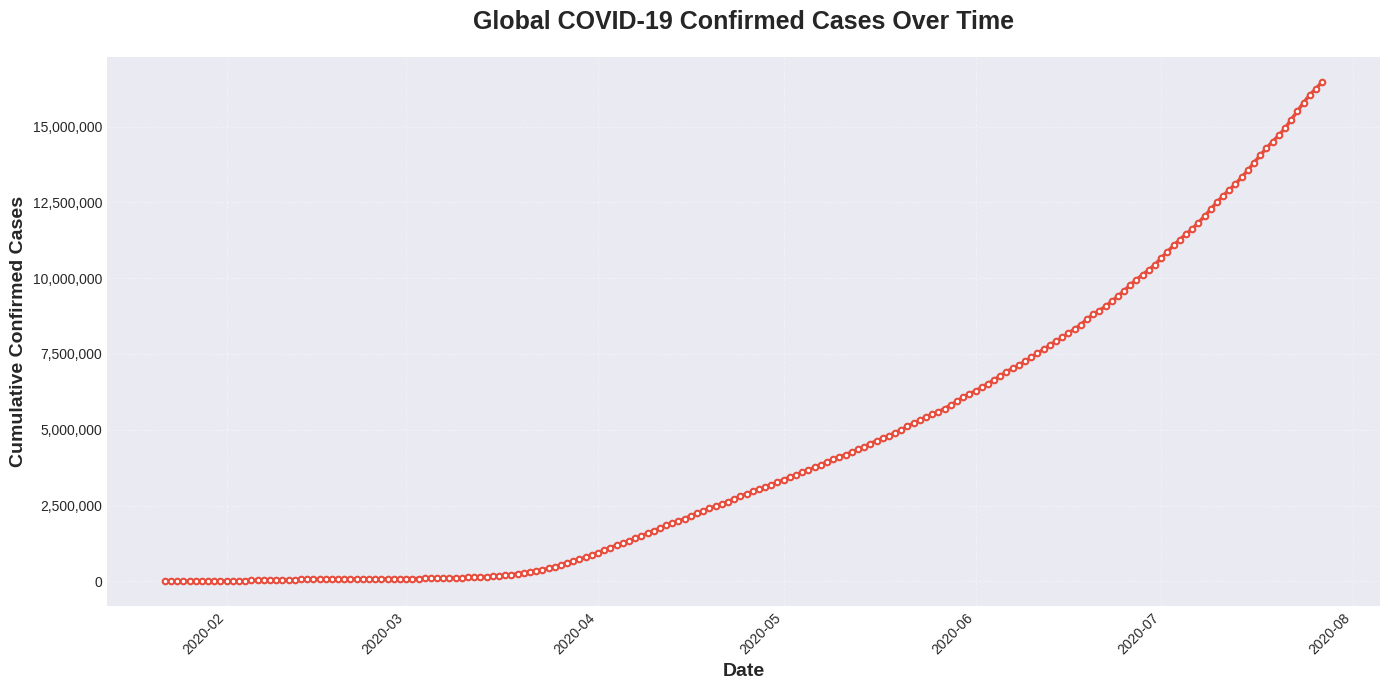

In [21]:
# Aggregate confirmed cases by date (sum across all countries/regions)
global_trend = df.groupby('Date')['Confirmed'].sum().reset_index()

# Create the line chart
plt.figure(figsize=(14, 7))

plt.plot(global_trend['Date'], global_trend['Confirmed'],
         linewidth=2.5, color='#e74c3c', marker='o', markersize=4,
         markerfacecolor='white', markeredgewidth=1.5, markeredgecolor='#e74c3c')

# Styling
plt.title('Global COVID-19 Confirmed Cases Over Time',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Confirmed Cases', fontsize=14, fontweight='bold')

# Format y-axis with comma separators
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Add grid and rotate dates
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Print summary statistics
print("=" * 60)
print("GLOBAL TREND SUMMARY")
print("=" * 60)
print(f"Total confirmed cases at end of period: {global_trend['Confirmed'].iloc[-1]:,}")
print(f"Average daily increase: {global_trend['Confirmed'].diff().mean():,.0f}")
print(f"Maximum single-day increase: {global_trend['Confirmed'].diff().max():,.0f}")

GLOBAL TREND SUMMARY
Total confirmed cases at end of period: 16,480,485
Average daily increase: 88,128
Maximum single-day increase: 282,756


2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [23]:
# put your answer here
# Display all unique countries to choose from
print("Available countries in the dataset:")
print(df['Country/Region'].unique())
print(f"\nTotal number of countries: {df['Country/Region'].nunique()}")

Available countries in the dataset:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Greenland' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait' 'Kyrgyz

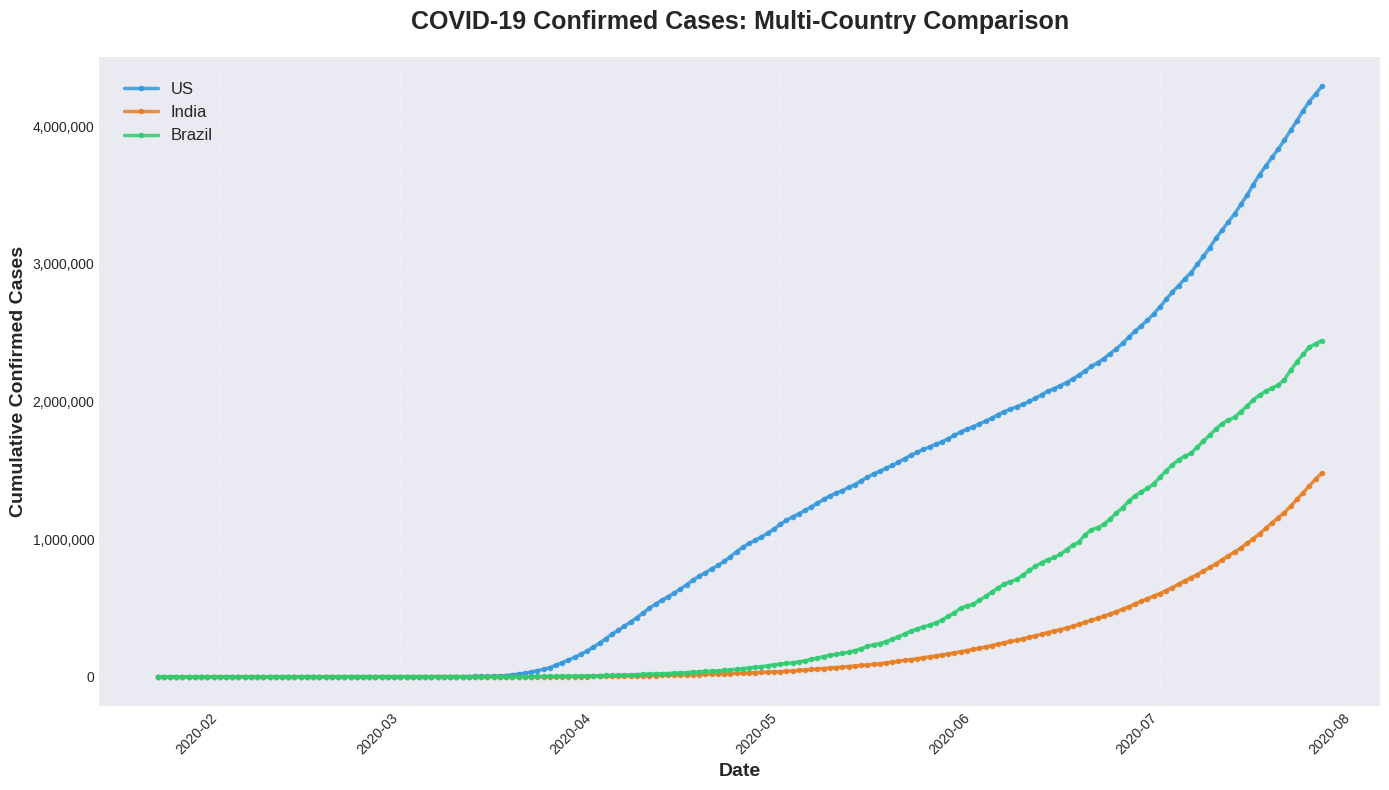

In [24]:
# Define three countries for comparison
countries = ['US', 'India', 'Brazil']

# Aggregate by country and date
country_trends = df.groupby(['Country/Region', 'Date'])['Confirmed'].sum().reset_index()

# Filter for selected countries
country_comparison = country_trends[country_trends['Country/Region'].isin(countries)]

# Create the visualization
plt.figure(figsize=(14, 8))

# Define color palette
colors = {'US': '#3498db', 'India': '#e67e22', 'Brazil': '#2ecc71'}

# Plot each country
for country in countries:
    country_data = country_comparison[country_comparison['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'],
             linewidth=2.5, label=country, marker='o', markersize=3,
             color=colors.get(country, None), alpha=0.85)

# Styling
plt.title('COVID-19 Confirmed Cases: Multi-Country Comparison',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Confirmed Cases', fontsize=14, fontweight='bold')

# Legend and formatting
plt.legend(fontsize=12, loc='upper left', framealpha=0.95, shadow=True, borderpad=1)
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Print comparative statistics
print("=" * 60)
print("COUNTRY COMPARISON STATISTICS")
print("=" * 60)

for country in countries:
    country_final = country_comparison[country_comparison['Country/Region'] == country]
    total = country_final['Confirmed'].iloc[-1]
    print(f"{country:15} - Total: {total:12,} cases")

print("\n" + "=" * 60)
print("PEAK DAILY INCREASES")
print("=" * 60)

for country in countries:
    country_data = country_comparison[country_comparison['Country/Region'] == country].copy()
    country_data['Daily_Increase'] = country_data['Confirmed'].diff()
    max_increase = country_data['Daily_Increase'].max()
    max_date = country_data.loc[country_data['Daily_Increase'].idxmax(), 'Date']
    print(f"{country}: {max_increase:,.0f} cases on {max_date.strftime('%Y-%m-%d')}")

COUNTRY COMPARISON STATISTICS
US              - Total:    4,290,259 cases
India           - Total:    1,480,073 cases
Brazil          - Total:    2,442,375 cases

PEAK DAILY INCREASES
US: 77,255 cases on 2020-07-16
India: 49,981 cases on 2020-07-26
Brazil: 67,860 cases on 2020-07-22


3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

In [26]:
# put your answer here
# Check which countries have recovery data
countries_with_recovery = df[df['Recovered'] > 0]['Country/Region'].unique()
print(f"Countries with recovery data: {len(countries_with_recovery)}")
print("\nSample countries:")
print(countries_with_recovery[:20])

Countries with recovery data: 182

Sample countries:
['China' 'Japan' 'Thailand' 'Australia' 'Vietnam' 'Taiwan*' 'South Korea'
 'Malaysia' 'Singapore' 'Sri Lanka' 'US' 'Cambodia' 'Finland' 'France'
 'Nepal' 'Philippines' 'Russia' 'United Arab Emirates' 'United Kingdom'
 'Germany']


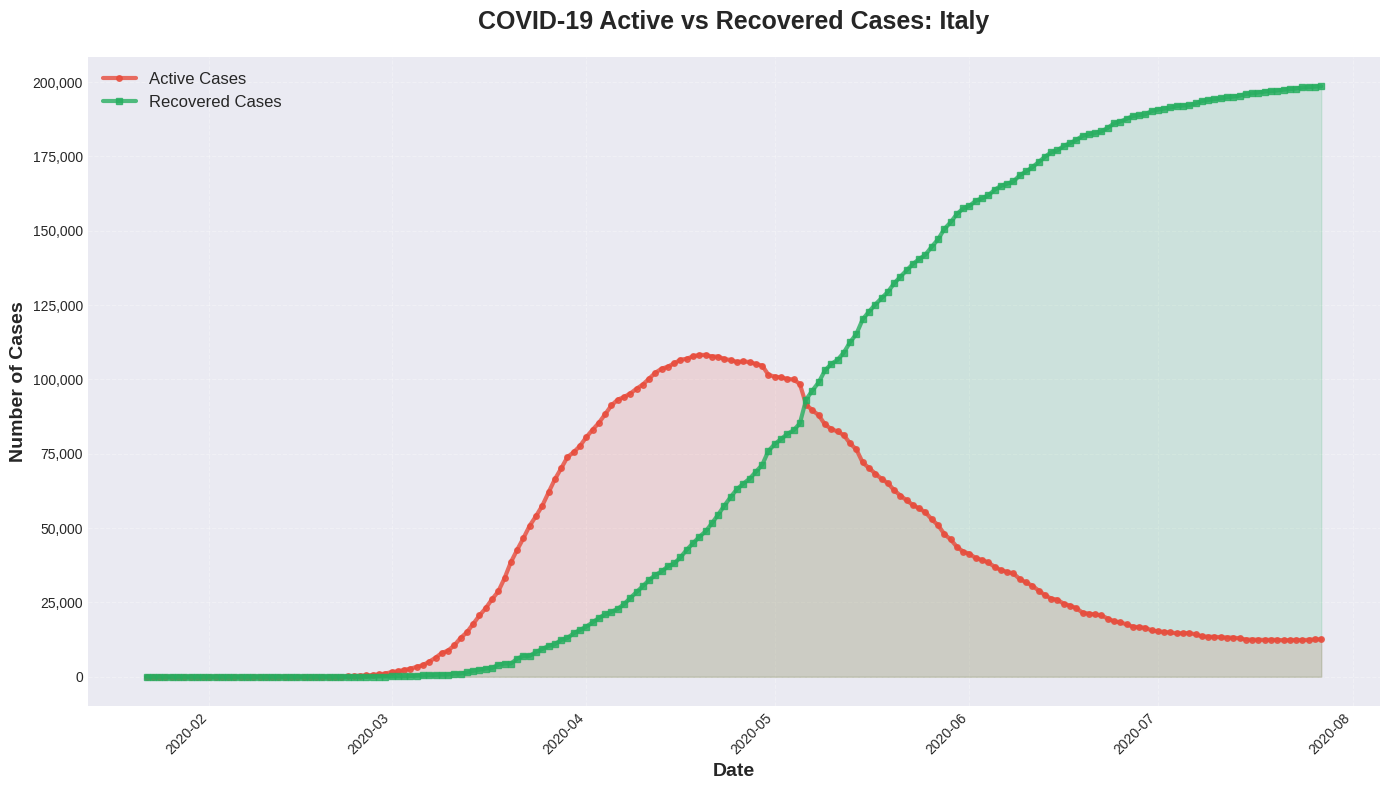

In [27]:
# Select a country (Italy is a good example with clear recovery patterns)
selected_country = 'Italy'

# Filter and aggregate data
country_recovery = df[df['Country/Region'] == selected_country].groupby('Date').agg({
    'Active': 'sum',
    'Recovered': 'sum',
    'Confirmed': 'sum'
}).reset_index()

# Calculate recovery rate
country_recovery['Recovery_Rate'] = (country_recovery['Recovered'] /
                                      country_recovery['Confirmed'] * 100)

# Create visualization
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Active cases
line1 = ax1.plot(country_recovery['Date'], country_recovery['Active'],
                 linewidth=3, color='#e74c3c', label='Active Cases',
                 marker='o', markersize=4, alpha=0.8)

# Plot Recovered cases
line2 = ax1.plot(country_recovery['Date'], country_recovery['Recovered'],
                 linewidth=3, color='#27ae60', label='Recovered Cases',
                 marker='s', markersize=4, alpha=0.8)

# Fill areas for visual emphasis
ax1.fill_between(country_recovery['Date'], country_recovery['Active'],
                 alpha=0.15, color='#e74c3c')
ax1.fill_between(country_recovery['Date'], country_recovery['Recovered'],
                 alpha=0.15, color='#27ae60')

# Styling
ax1.set_title(f'COVID-19 Active vs Recovered Cases: {selected_country}',
              fontsize=18, fontweight='bold', pad=20)
ax1.set_xlabel('Date', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Cases', fontsize=14, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Legend and grid
ax1.legend(fontsize=12, loc='upper left', framealpha=0.95, shadow=True)
ax1.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
# Find and annotate crossover point
crossover_dates = country_recovery[country_recovery['Recovered'] > country_recovery['Active']]

if len(crossover_dates) > 0:
    crossover_date = crossover_dates.iloc[0]['Date']
    crossover_active = crossover_dates.iloc[0]['Active']
    crossover_recovered = crossover_dates.iloc[0]['Recovered']

    print("=" * 60)
    print(f"CROSSOVER ANALYSIS: {selected_country}")
    print("=" * 60)
    print(f"Crossover date (Recovered > Active): {crossover_date.strftime('%Y-%m-%d')}")
    print(f"Active cases at crossover: {crossover_active:,}")
    print(f"Recovered cases at crossover: {crossover_recovered:,}")
else:
    print("No crossover point found in the data period")

# Summary statistics
print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"Peak active cases: {country_recovery['Active'].max():,}")
print(f"Final recovered cases: {country_recovery['Recovered'].iloc[-1]:,}")
print(f"Final recovery rate: {country_recovery['Recovery_Rate'].iloc[-1]:.2f}%")

CROSSOVER ANALYSIS: Italy
Crossover date (Recovered > Active): 2020-05-06
Active cases at crossover: 91,528
Recovered cases at crossover: 93,245

SUMMARY STATISTICS
Peak active cases: 108,257
Final recovered cases: 198,593
Final recovery rate: 80.64%


## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [29]:
# put your answer here
# Check available dates
print("Date range in dataset:")
print(f"Earliest: {df['Date'].min()}")
print(f"Latest: {df['Date'].max()}")

# Select a specific date for comparison (you can change this)
comparison_date = '2020-12-31'  # End of 2020
comparison_date = pd.to_datetime(comparison_date)

print(f"\nSelected comparison date: {comparison_date.strftime('%Y-%m-%d')}")

# Check if date exists in data
if comparison_date in df['Date'].values:
    print("✓ Date exists in dataset")
else:
    print("✗ Date not found. Selecting closest available date...")
    closest_date = df['Date'].iloc[(df['Date'] - comparison_date).abs().argsort()[0]]
    comparison_date = closest_date
    print(f"Using: {comparison_date.strftime('%Y-%m-%d')}")

Date range in dataset:
Earliest: 2020-01-22 00:00:00
Latest: 2020-07-27 00:00:00

Selected comparison date: 2020-12-31
✗ Date not found. Selecting closest available date...
Using: 2020-07-27


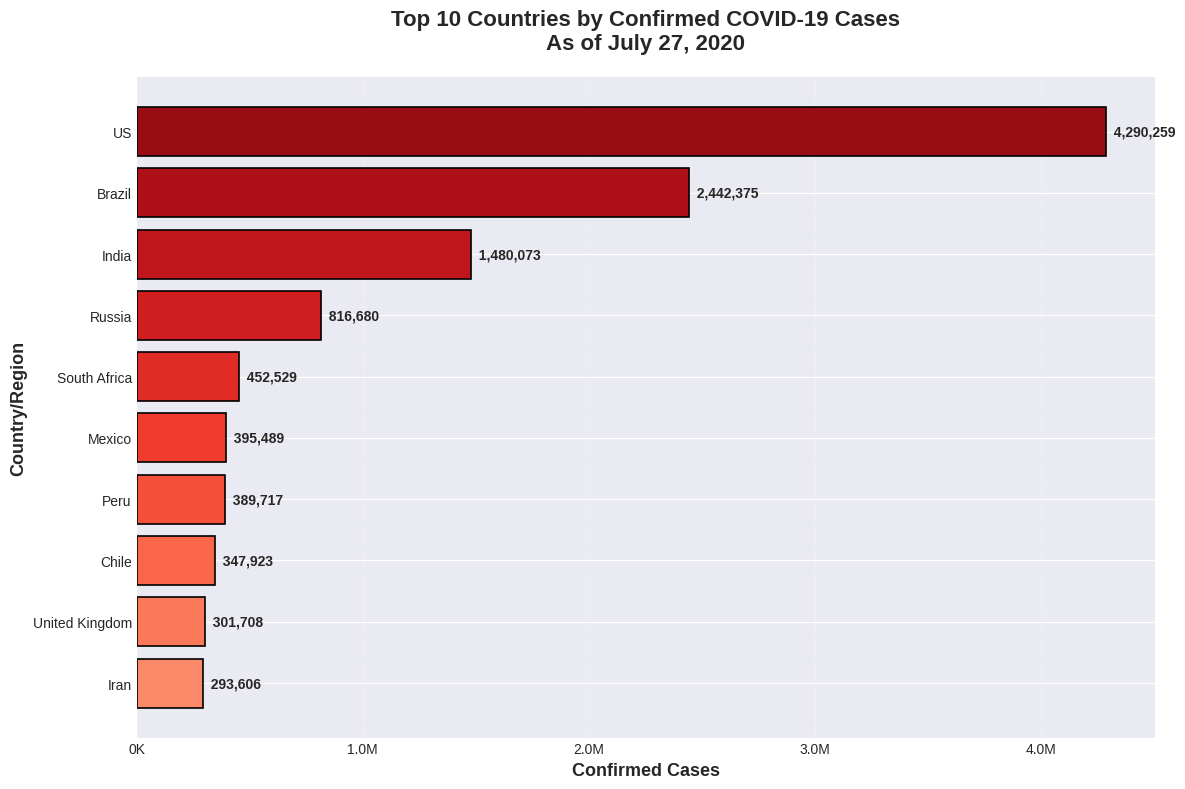

In [30]:
# Filter data for the specific date
date_snapshot = df[df['Date'] == comparison_date].copy()

# Aggregate by country (in case of multiple provinces/states)
country_snapshot = date_snapshot.groupby('Country/Region')['Confirmed'].sum().reset_index()

# Get top 10 countries
top10 = country_snapshot.nlargest(10, 'Confirmed').sort_values('Confirmed', ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(12, 8))

# Create color gradient
colors = plt.cm.Reds(np.linspace(0.4, 0.9, len(top10)))

# Plot horizontal bars
bars = plt.barh(top10['Country/Region'], top10['Confirmed'],
                color=colors, edgecolor='black', linewidth=1.2)

# Add value labels on bars
for i, (country, value) in enumerate(zip(top10['Country/Region'], top10['Confirmed'])):
    plt.text(value, i, f'  {value:,.0f}',
             va='center', fontsize=10, fontweight='bold')

# Styling
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases\nAs of {comparison_date.strftime("%B %d, %Y")}',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Confirmed Cases', fontsize=13, fontweight='bold')
plt.ylabel('Country/Region', fontsize=13, fontweight='bold')

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6):.1f}M' if x >= 1e6 else f'{int(x/1e3):.0f}K'))

# Grid
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [31]:
# Print detailed rankings
print("=" * 70)
print(f"TOP 10 COUNTRIES ON {comparison_date.strftime('%Y-%m-%d')}")
print("=" * 70)

top10_sorted = top10.sort_values('Confirmed', ascending=False)
for rank, (idx, row) in enumerate(top10_sorted.iterrows(), 1):
    print(f"{rank:2}. {row['Country/Region']:25} {row['Confirmed']:12,} cases")

# Calculate concentration
total_top10 = top10['Confirmed'].sum()
total_global = country_snapshot['Confirmed'].sum()
concentration = (total_top10 / total_global) * 100

print("\n" + "=" * 70)
print(f"Top 10 countries represent {concentration:.1f}% of global cases")
print(f"Total global cases on this date: {total_global:,}")
print("=" * 70)

TOP 10 COUNTRIES ON 2020-07-27
 1. US                           4,290,259 cases
 2. Brazil                       2,442,375 cases
 3. India                        1,480,073 cases
 4. Russia                         816,680 cases
 5. South Africa                   452,529 cases
 6. Mexico                         395,489 cases
 7. Peru                           389,717 cases
 8. Chile                          347,923 cases
 9. United Kingdom                 301,708 cases
10. Iran                           293,606 cases

Top 10 countries represent 68.0% of global cases
Total global cases on this date: 16,480,485


5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

In [32]:
# put your answer here
# Display available WHO Regions
print("Available WHO Regions in dataset:")
print(df['WHO Region'].unique())
print(f"\nTotal WHO Regions: {df['WHO Region'].nunique()}")

# Check for null values
print(f"Rows with missing WHO Region: {df['WHO Region'].isna().sum()}")

Available WHO Regions in dataset:
['Eastern Mediterranean' 'Europe' 'Africa' 'Americas' 'Western Pacific'
 'South-East Asia']

Total WHO Regions: 6
Rows with missing WHO Region: 0


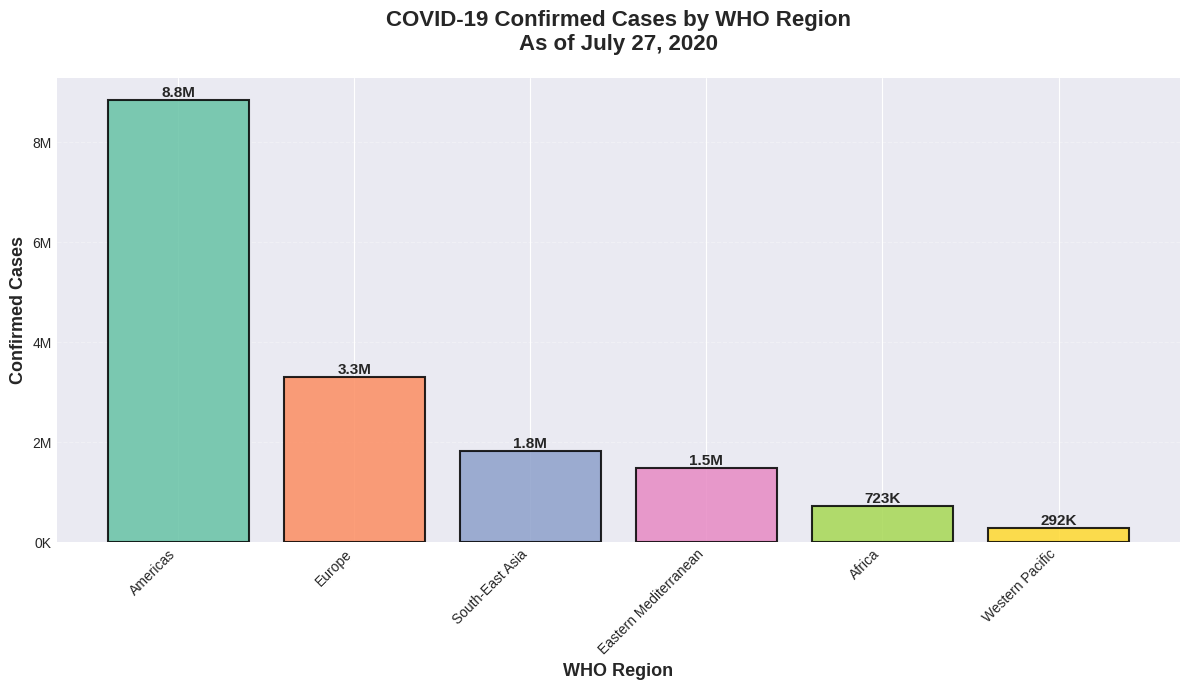

In [33]:
# Get the most recent date for comparison
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date].copy()

# Aggregate by WHO Region
regional_cases = latest_data.groupby('WHO Region')['Confirmed'].sum().reset_index()
regional_cases = regional_cases.sort_values('Confirmed', ascending=False)

# Create bar chart
plt.figure(figsize=(12, 7))

# Color palette
colors_palette = sns.color_palette("Set2", len(regional_cases))

# Create bars
bars = plt.bar(regional_cases['WHO Region'], regional_cases['Confirmed'],
               color=colors_palette, edgecolor='black', linewidth=1.5, alpha=0.85)

# Add value labels on top of bars
for i, (region, value) in enumerate(zip(regional_cases['WHO Region'], regional_cases['Confirmed'])):
    label = f'{value/1e6:.1f}M' if value >= 1e6 else f'{value/1e3:.0f}K'
    plt.text(i, value, label,
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Styling
plt.title(f'COVID-19 Confirmed Cases by WHO Region\nAs of {latest_date.strftime("%B %d, %Y")}',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('WHO Region', fontsize=13, fontweight='bold')
plt.ylabel('Confirmed Cases', fontsize=13, fontweight='bold')

# Format y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'))

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [34]:
# Print detailed regional breakdown
print("=" * 70)
print(f"WHO REGIONAL BREAKDOWN ({latest_date.strftime('%Y-%m-%d')})")
print("=" * 70)

for idx, row in regional_cases.iterrows():
    percentage = (row['Confirmed'] / regional_cases['Confirmed'].sum()) * 100
    print(f"{row['WHO Region']:30} {row['Confirmed']:15,} ({percentage:5.1f}%)")

print("\n" + "=" * 70)
print(f"Total global cases: {regional_cases['Confirmed'].sum():,}")
print("=" * 70)

WHO REGIONAL BREAKDOWN (2020-07-27)
Americas                             8,839,286 ( 53.6%)
Europe                               3,299,523 ( 20.0%)
South-East Asia                      1,835,297 ( 11.1%)
Eastern Mediterranean                1,490,744 (  9.0%)
Africa                                 723,207 (  4.4%)
Western Pacific                        292,428 (  1.8%)

Total global cases: 16,480,485


## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [35]:
# put your answer here
# Select a date for geographic visualization
map_date = pd.to_datetime('2020-07-01')  # Mid-2020, first wave

print(f"Selected date for geographic visualization: {map_date.strftime('%Y-%m-%d')}")

# Check if date exists
if map_date not in df['Date'].values:
    closest_date = df['Date'].iloc[(df['Date'] - map_date).abs().argsort()[0]]
    map_date = closest_date
    print(f"Date adjusted to: {map_date.strftime('%Y-%m-%d')}")

Selected date for geographic visualization: 2020-07-01


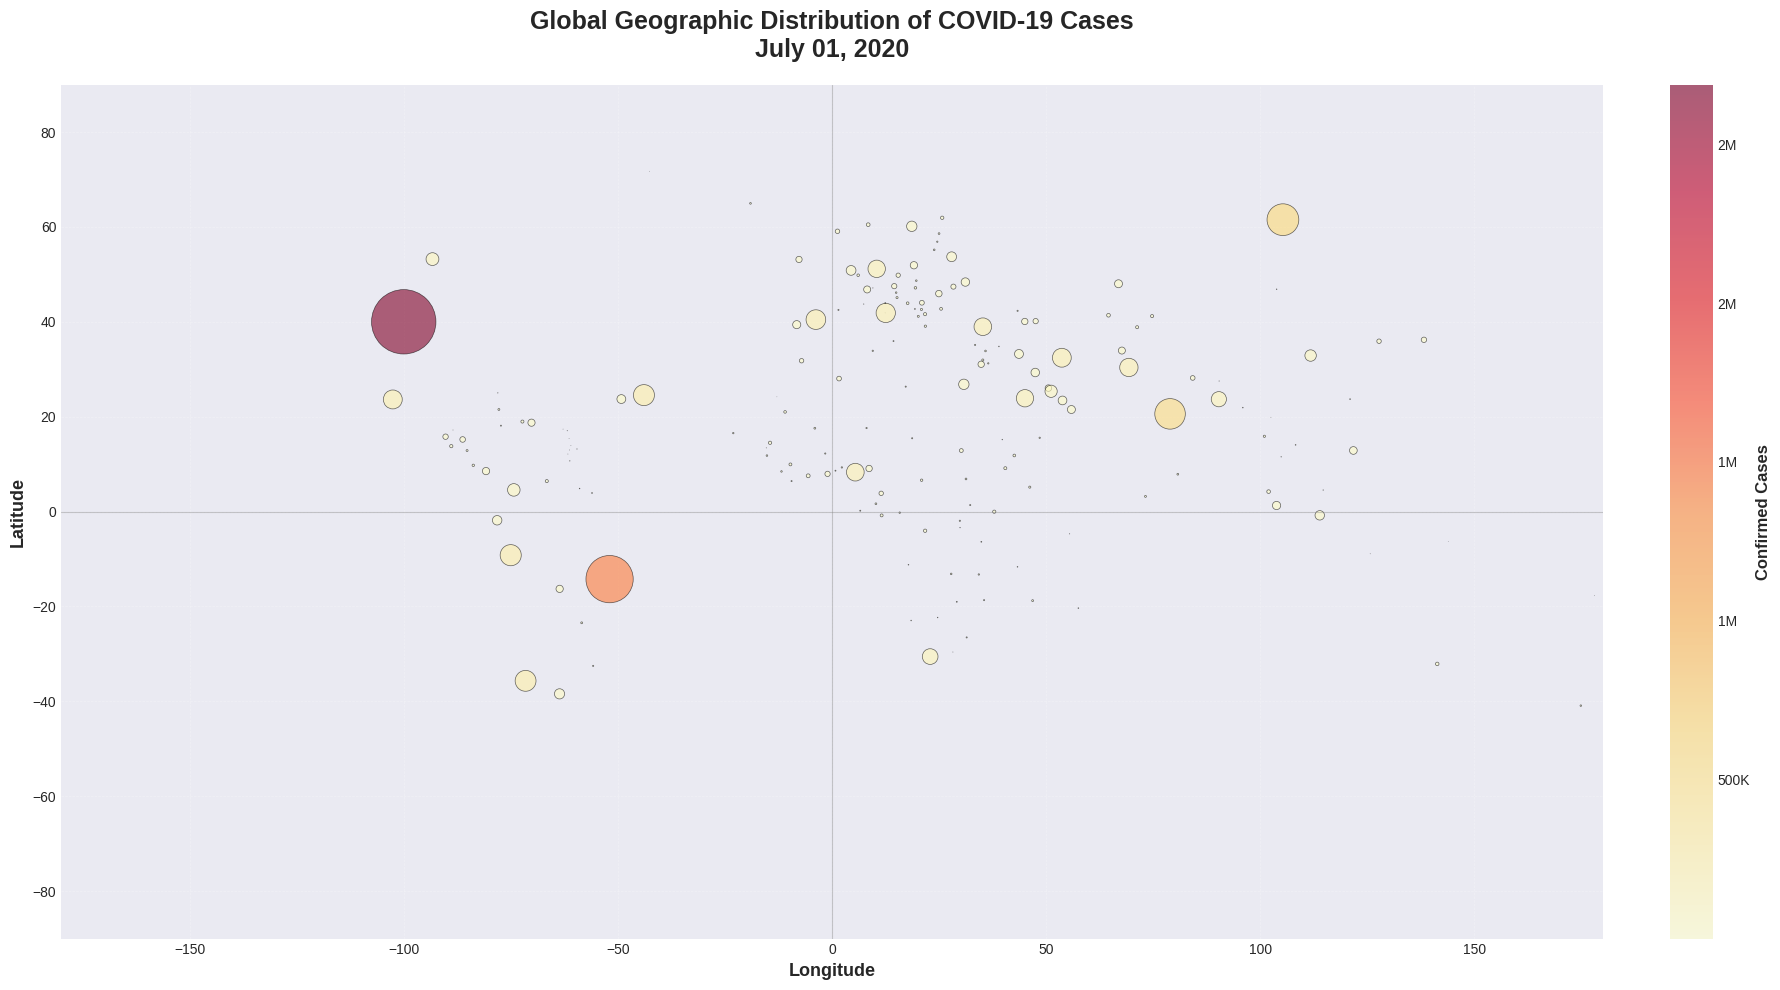

In [36]:
# Filter data for the specific date
geo_data = df[df['Date'] == map_date].copy()

# Aggregate by country (average lat/long for country centroid)
geo_aggregated = geo_data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Remove rows with missing coordinates
geo_aggregated = geo_aggregated.dropna(subset=['Lat', 'Long'])

# Normalize bubble sizes (scale for visibility)
size_factor = 0.8  # Adjust this to control bubble sizes
geo_aggregated['Bubble_Size'] = (geo_aggregated['Confirmed'] / 1000) * size_factor

# Create the map visualization
fig, ax = plt.subplots(figsize=(18, 10))

# Create scatter plot with bubble sizes
scatter = ax.scatter(geo_aggregated['Long'], geo_aggregated['Lat'],
                     s=geo_aggregated['Bubble_Size'],
                     c=geo_aggregated['Confirmed'],
                     cmap='YlOrRd',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Confirmed Cases', fontsize=12, fontweight='bold')
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x/1e3)}K'))

# Styling
ax.set_title(f'Global Geographic Distribution of COVID-19 Cases\n{map_date.strftime("%B %d, %Y")}',
             fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')

# Add grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)

# Set world boundaries
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# Add equator and prime meridian for reference
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.4, label='Equator')
ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.8, alpha=0.4, label='Prime Meridian')

plt.tight_layout()
plt.show()

In [37]:
# Print geographic summary
print("=" * 70)
print(f"GEOGRAPHIC DISTRIBUTION SUMMARY ({map_date.strftime('%Y-%m-%d')})")
print("=" * 70)
print(f"Countries represented: {len(geo_aggregated)}")
print(f"Total confirmed cases: {geo_aggregated['Confirmed'].sum():,}")

print("\n" + "=" * 70)
print("TOP 5 HOTSPOTS")
print("=" * 70)

top5_geo = geo_aggregated.nlargest(5, 'Confirmed')
for idx, row in top5_geo.iterrows():
    print(f"{row['Country/Region']:20} - {row['Confirmed']:12,} cases")
    print(f"                     Location: ({row['Lat']:.2f}°, {row['Long']:.2f}°)")

GEOGRAPHIC DISTRIBUTION SUMMARY (2020-07-01)
Countries represented: 187
Total confirmed cases: 10,667,386

TOP 5 HOTSPOTS
US                   -    2,687,588 cases
                     Location: (40.00°, -100.00°)
Brazil               -    1,448,753 cases
                     Location: (-14.23°, -51.93°)
Russia               -      653,479 cases
                     Location: (61.52°, 105.32°)
India                -      604,641 cases
                     Location: (20.59°, 78.96°)
Peru                 -      288,477 cases
                     Location: (-9.19°, -75.02°)


7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [38]:
# put your answer here
# Display available WHO Regions
print("Available WHO Regions:")
regions_list = df['WHO Region'].unique()
for i, region in enumerate(regions_list, 1):
    print(f"{i}. {region}")

# Select a region (Europe has good geographic clustering)
selected_region = 'Europe'  # Change as needed

print(f"\nSelected region for analysis: {selected_region}")

Available WHO Regions:
1. Eastern Mediterranean
2. Europe
3. Africa
4. Americas
5. Western Pacific
6. South-East Asia

Selected region for analysis: Europe


In [39]:
# Use most recent date
regional_date = df['Date'].max()
regional_data = df[(df['Date'] == regional_date) & (df['WHO Region'] == selected_region)].copy()

# Aggregate by country
regional_aggregated = regional_data.groupby('Country/Region').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum',
    'Lat': 'mean',
    'Long': 'mean'
}).reset_index()

# Remove missing coordinates
regional_aggregated = regional_aggregated.dropna(subset=['Lat', 'Long'])

# Calculate case fatality rate
regional_aggregated['CFR'] = (regional_aggregated['Deaths'] /
                               regional_aggregated['Confirmed'] * 100)

print(f"Countries in {selected_region} region: {len(regional_aggregated)}")
print(f"Date: {regional_date.strftime('%Y-%m-%d')}")

Countries in Europe region: 56
Date: 2020-07-27


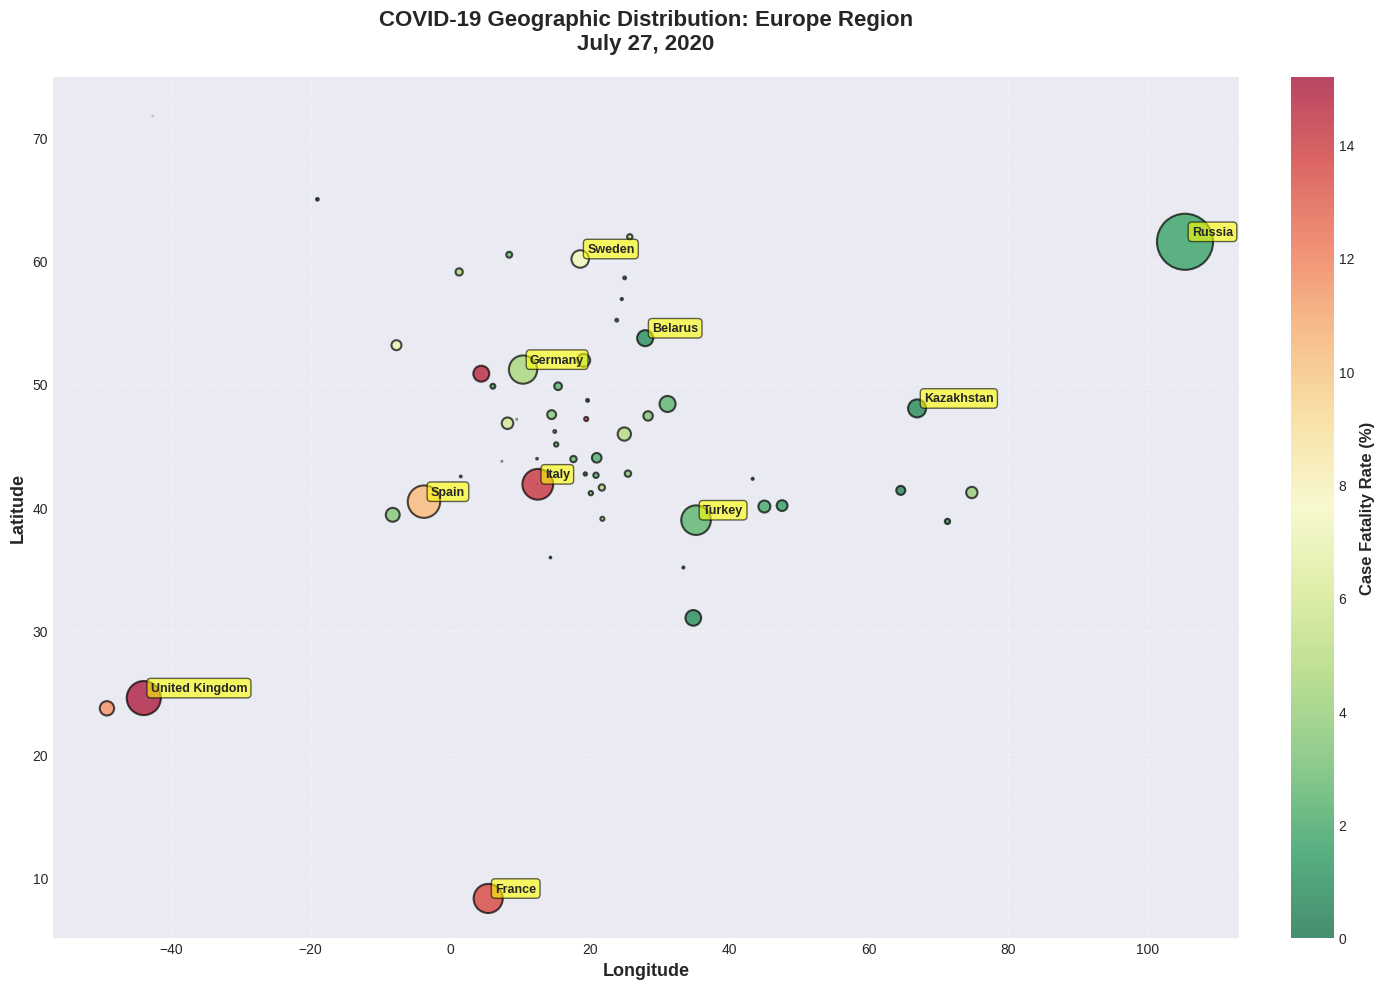

In [40]:
# Create visualization without clustering first
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot with bubble sizing
scatter = ax.scatter(regional_aggregated['Long'], regional_aggregated['Lat'],
                     s=regional_aggregated['Confirmed'] / 500,  # Scale factor
                     c=regional_aggregated['CFR'],
                     cmap='RdYlGn_r',  # Reversed: red=high CFR, green=low CFR
                     alpha=0.7,
                     edgecolors='black',
                     linewidth=1.5)

# Add country labels for top countries
top_countries = regional_aggregated.nlargest(10, 'Confirmed')
for idx, row in top_countries.iterrows():
    ax.annotate(row['Country/Region'],
                xy=(row['Long'], row['Lat']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.6))

# Colorbar
cbar = plt.colorbar(scatter, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Case Fatality Rate (%)', fontsize=12, fontweight='bold')

# Styling
ax.set_title(f'COVID-19 Geographic Distribution: {selected_region} Region\n{regional_date.strftime("%B %d, %Y")}',
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
clustering_data = regional_aggregated[['Lat', 'Long', 'Confirmed']].copy()

# Normalize features
scaler = StandardScaler()
clustering_features = scaler.fit_transform(clustering_data)

# Apply K-Means
n_clusters = 3  # Adjust based on your region
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
regional_aggregated['Cluster'] = kmeans.fit_predict(clustering_features)

print(f"K-Means clustering applied with {n_clusters} clusters")
print(f"Cluster assignments:\n{regional_aggregated['Cluster'].value_counts().sort_index()}")

K-Means clustering applied with 3 clusters
Cluster assignments:
Cluster
0     5
1    50
2     1
Name: count, dtype: int64


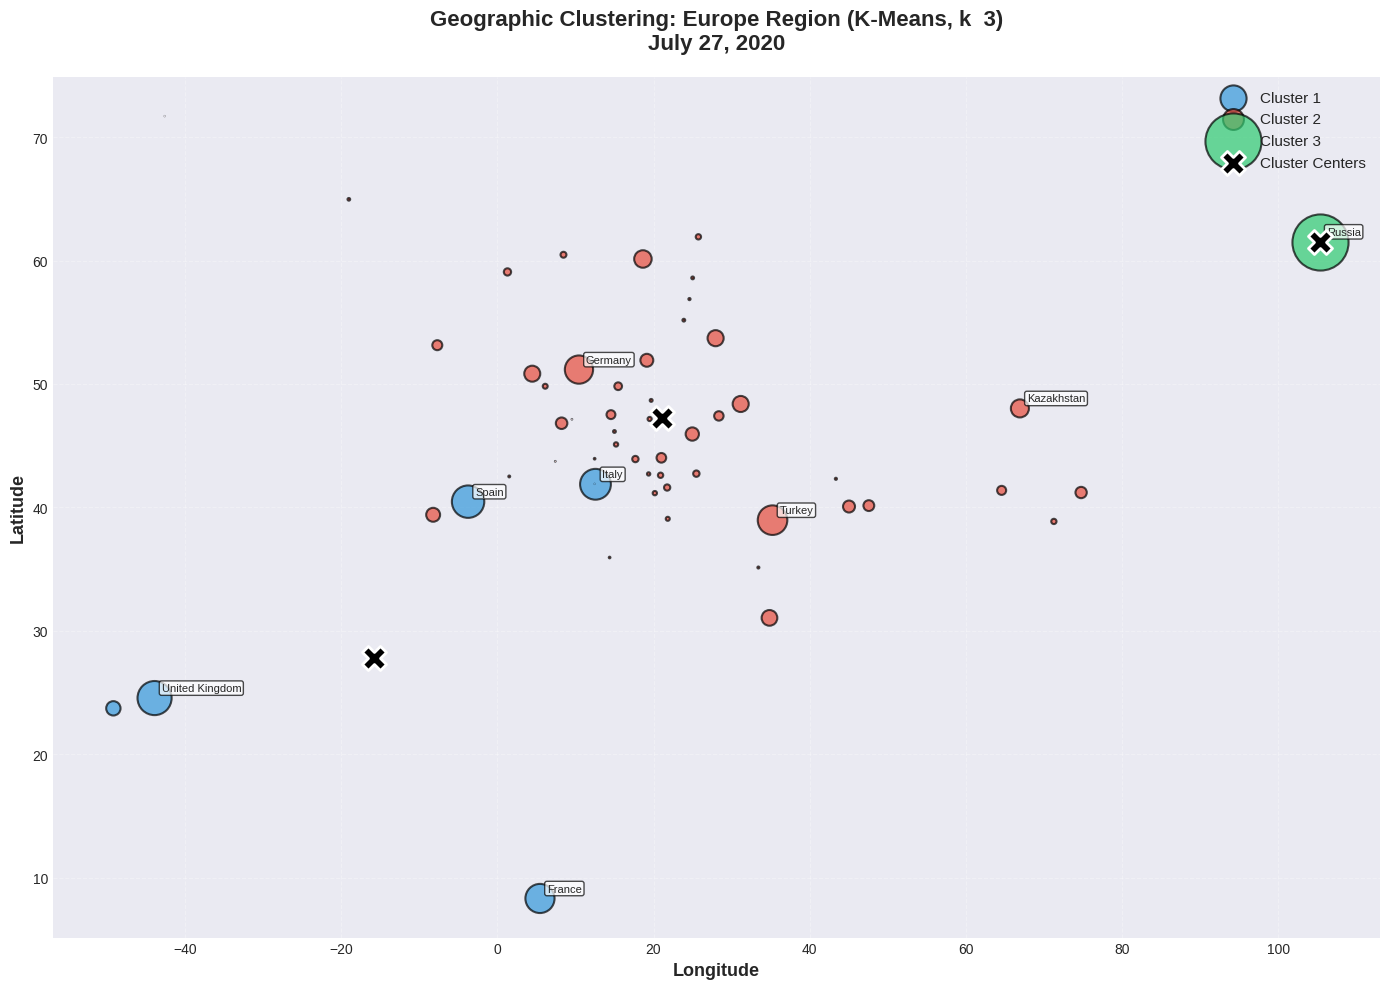

In [42]:
# Visualize with clusters
fig, ax = plt.subplots(figsize=(14, 10))

cluster_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

for cluster_id in range(n_clusters):
    cluster_data = regional_aggregated[regional_aggregated['Cluster'] == cluster_id]
    ax.scatter(cluster_data['Long'], cluster_data['Lat'],
               s=cluster_data['Confirmed'] / 500,
               c=cluster_colors[cluster_id],
               alpha=0.7,
               edgecolors='black',
               linewidth=1.5,
               label=f'Cluster {cluster_id + 1}')

# Plot cluster centers
centers = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(centers[:, 1], centers[:, 0],
           c='black', marker='X', s=300,
           edgecolors='white', linewidth=2,
           label='Cluster Centers', zorder=5)

# Add labels for major countries
for idx, row in regional_aggregated.nlargest(8, 'Confirmed').iterrows():
    ax.annotate(row['Country/Region'],
                xy=(row['Long'], row['Lat']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

    ax.set_title(f'Geographic Clustering: {selected_region} Region (K-Means, k  {n_clusters})\n{regional_date.strftime("%B %d, %Y")}',
fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=13, fontweight='bold')
ax.set_ylabel('Latitude', fontsize=13, fontweight='bold')
ax.legend(fontsize=11, loc='best', framealpha=0.9)

ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

In [43]:
# Analyze clusters
print("=" * 70)
print(f"{selected_region} REGION ANALYSIS ({regional_date.strftime('%Y-%m-%d')})")
print("=" * 70)
print(f"Countries in region: {len(regional_aggregated)}")
print(f"Total confirmed cases: {regional_aggregated['Confirmed'].sum():,}")
print(f"Average CFR: {regional_aggregated['CFR'].mean():.2f}%")

print("\n" + "=" * 70)
print("TOP 5 COUNTRIES BY CONFIRMED CASES")
print("=" * 70)

for idx, row in regional_aggregated.nlargest(5, 'Confirmed').iterrows():
    print(f"{row['Country/Region']:20} {row['Confirmed']:12,} cases (CFR: {row['CFR']:.2f}%)")

print("\n" + "=" * 70)
print("CLUSTER ANALYSIS")
print("=" * 70)

for cluster_id in range(n_clusters):
    cluster_countries = regional_aggregated[regional_aggregated['Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id + 1}:")
    print(f"  Countries: {len(cluster_countries)}")
    print(f"  Total cases: {cluster_countries['Confirmed'].sum():,}")
    print(f"  Avg latitude: {cluster_countries['Lat'].mean():.2f}°")
    print(f"  Avg longitude: {cluster_countries['Long'].mean():.2f}°")
    print(f"  Members: {', '.join(cluster_countries['Country/Region'].tolist()[:5])}")
    if len(cluster_countries) > 5:
        print(f"           ... and {len(cluster_countries) - 5} more")

Europe REGION ANALYSIS (2020-07-27)
Countries in region: 56
Total confirmed cases: 3,299,523
Average CFR: 4.20%

TOP 5 COUNTRIES BY CONFIRMED CASES
Russia                    816,680 cases (CFR: 1.63%)
United Kingdom            301,708 cases (CFR: 15.19%)
Spain                     272,421 cases (CFR: 10.44%)
Italy                     246,286 cases (CFR: 14.26%)
Turkey                    227,019 cases (CFR: 2.48%)

CLUSTER ANALYSIS

Cluster 1:
  Countries: 5
  Total cases: 1,094,180
  Avg latitude: 27.78°
  Avg longitude: -15.76°
  Members: France, Italy, Netherlands, Spain, United Kingdom

Cluster 2:
  Countries: 50
  Total cases: 1,388,663
  Avg latitude: 47.24°
  Avg longitude: 21.07°
  Members: Albania, Andorra, Armenia, Austria, Azerbaijan
           ... and 45 more

Cluster 3:
  Countries: 1
  Total cases: 816,680
  Avg latitude: 61.52°
  Avg longitude: 105.32°
  Members: Russia
